## 多元线性回归

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import joblib  #保存模型
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


: 

In [2]:
df = pd.read_csv("./data/ads_3.csv")
x = df[df.columns[:62]]
y = df[df.columns[62]]


In [4]:
df.columns

Index(['People', 'Female', 'Male', 'Female.Celebrity', 'Male.Celebrity',
       'Child', 'Teen', 'Elderly', 'Multiple.Ethnicities', 'Ethnic.Minority',
       'Disability.Representation', 'Animal', 'Dog', 'Cat', 'Prominent.Animal',
       'Voiceover', 'Female.Voiceover', 'Male.Voiceover',
       'Amazon'.in.Voiceover', 'Products', 'Prominent.Music',
       'Pop.Culture.Music', 'Jingle.Appearance', 'Dancing',
       'Parent-Child.Interation', 'Dialogue', 'Animated', 'Humor',
       'High-arousal.Happiness', 'Low-arousal.Happiness', 'Sadness',
       'Prominent.Amazon.Logo', 'Number.of.Amazon.Logo.Appearance',
       'Smile.Logo', 'Amazon.Brands', 'Non-Amazon.Brands', 'Amazon.App',
       'Amazon.Website', 'Amazon.Search.Bar', 'Amazon.Boxes',
       'Amazon.Box.Opening', 'Amazon.Vans', 'Amazon.Employee', 'Amaon.Devices',
       'Start.card', 'End.card', 'Number.of.Benefits', 'Selection.Benefit',
       'Shipping.Benefit', 'Price.Information', 'Amazon.Saves.the.Day',
       'Call.to.Action

In [160]:
# 选取最好的三个feature
selectKBest = SelectKBest(f_regression, k=3)
bestFeature = selectKBest.fit_transform(x,y)
selectKBest.get_support()
x.columns[selectKBest.get_support()]

Index(['Voiceover', 'Amazon'.in.Voiceover', 'Amazon.Employee'], dtype='object')

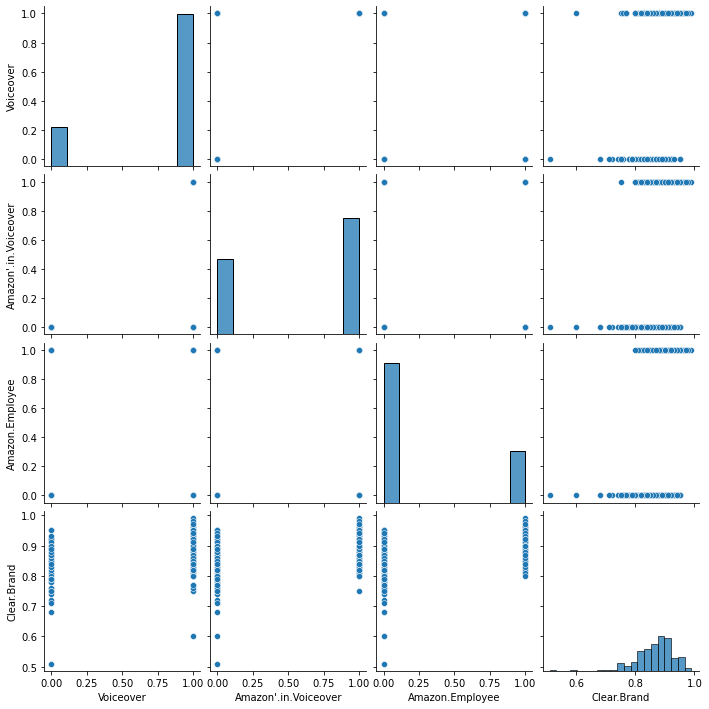

In [136]:
sns.pairplot(df[["Voiceover", "Amazon'.in.Voiceover", "Amazon.Employee", "Clear.Brand"]])

### 特征归一化

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for feature in df.columns[:63]:
    df["标准化"+feature] = scaler.fit_transform(np.array(df[feature]).reshape(-1,1))
df.head()

,People,Female,Male,Female.Celebrity,Male.Celebrity,Child,Teen,Elderly,Multiple.Ethnicities,Ethnic.Minority,...,标准化Meaning,标准化Transformation,标准化Mastery,标准化Belonging,标准化Autonomy,标准化Awe,标准化Mix,标准化Benefits,标准化Brand,标准化Clear.Brand
0,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.812500
1,1,1,1,0,0,1,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.708333
2,1,0,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.916667
3,1,1,1,0,0,0,0,0,1,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.895833
4,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.625000


### 特征标准化

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(df[df.columns[:62]])

## 回归预测

In [9]:
# X:表示自变量是矩阵
# y:表示目标值
X = df[df.columns[:62]]
y = df[df.columns[62]]

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=0)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
model.score(X_test, y_test)  # 计算的就是R_squared

0.03679793712491208

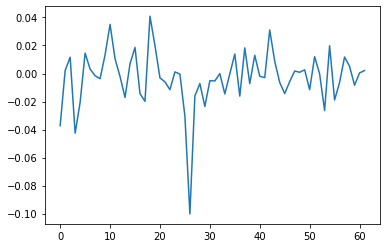

In [171]:
model.coef_ #计算所有特征的斜率
plt.plot(model.coef_)

In [ ]:
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

## 回归模型评估指标


### 1、Mean Absolute Error平均绝对误差
- 计算预测值与真实值之间的绝对值误差

In [165]:
metrics.mean_absolute_error(y_test, y_pred)

0.051201206900941224

### 2、Mean Squared Error均方误差
- 计算之前必须去掉所有的缺失值

In [166]:
metrics.mean_squared_error(y_test, y_pred)

0.00492469113885147

### 3、RMSE均方根误差
- RMSE是MSE的平方根
- RMSE通常比MAE大
- RMSE的量纲与原始数据量纲相同
- RMSE便于求导，因此通常作为回归模型的评估指标

In [167]:
import math
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.0701761436590204

### 4、R_squared R平方（可决系数）
- 在分类问题中，经常将随机分类器作为基准模型，随机分类器的准确率为0.5
- 在回归问题中，我们将输出品骏值得回归器作为基准模型
- 将一个回归模型的MSE除以基准模型的MSE，就可以计算R方了
- 如果回归模型与基准模型一样差，R_squared=0
- 如果回归模型完美预测，R_squared=1
- 如果回归模型比基准模型还要差，R_squared<0

In [168]:
metrics.r2_score(y_test, y_pred)

0.036797937124912306

### 5、Adjusted R_squared 修正R平方
- k: 表示特征个数
- n：数据样本数
- 实际上，如果增加了好的特征，R方会增大，修正R方会增大

## part1、使用所有的62个特征分别对12个目标值进行预测

In [14]:
X = df[df.columns[:62]]
std = StandardScaler()
X_std = std.fit_transform(X)
Y = df[df.columns[62:]]
MSE = []
RMSE = []
R_squared = []


for i in range(12):
    y = Y[Y.columns[i]]
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    joblib.dump(model, "model/regression/model{}_allFactor.pkl".format(i+1))
    y_pred = model.predict(X_test)
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    R_squared.append(metrics.r2_score(y_test, y_pred))




In [15]:
result_dic = {"MSE":MSE, "RMSE":RMSE, "R_squared":R_squared}
result_df = pd.DataFrame(result_dic, index=Y.columns)
result_df.to_csv("result/regression_allFactor.csv")

## pary2、从62个factor中选取最好的三个用来预测目标值

In [19]:
X = df[df.columns[:62]]
std = StandardScaler()
X_std = std.fit_transform(X)
Y = df[df.columns[62:]]
MSE = []
RMSE = []
R_squared = []
for i in range(12):
    y = Y[Y.columns[i]]
    selectKBest = SelectKBest(f_regression, k=3)
    bestFeature = selectKBest.fit_transform(X,y)
    selectKBest.get_support()
    X = df[X.columns[selectKBest.get_support()]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    model = LinearRegression()
    model.fit(X_train, y_train)
    joblib.dump(model, "model/regression/model{}_keyFactor.pkl".format(i+1))
    y_pred = model.predict(X_test)
    MSE.append(metrics.mean_squared_error(y_test, y_pred))
    RMSE.append(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    R_squared.append(metrics.r2_score(y_test, y_pred))
    



In [20]:
result_dic = {"MSE":MSE, "RMSE":RMSE, "R_squared":R_squared}
result_df = pd.DataFrame(result_dic, index=Y.columns)
result_df.to_csv("result/regression_keyFactor.csv")